# <b>BREAST CANCER PREDICTION</b><br>
## DWM Lab ESE Assignment<br>

### Performing classification using<br>
1.KNN algorithm<br>
2.Support Vector Machine<br>
3.Naive Bayes<br>

![cover_img](dataset-cover.jpg)

### Importing the various libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Reading the dataset using pandas

In [3]:
data = pd.read_csv("breastCancer.csv")
data.shape

(699, 11)

### Data Preprocessing

In [4]:
data.head() 

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


### Classes: 
BENIGN - 2 - NON-CANCEROUS <br>
MALIGNANT - 4 - CANCEROUS

2    458
4    241
Name: class, dtype: int64


<AxesSubplot:>

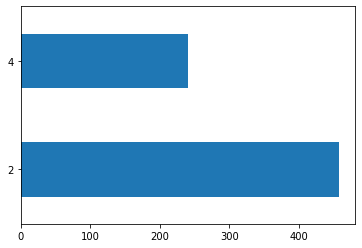

In [5]:
fig_data = data['class'].value_counts()
print(fig_data)
fig_data.plot(kind='barh' )
# Prints the type of each class

In [6]:
data.dtypes # List of various attributes and their types

id                    int64
clump_thickness       int64
size_uniformity       int64
shape_uniformity      int64
marginal_adhesion     int64
epithelial_size       int64
bare_nucleoli        object
bland_chromatin       int64
normal_nucleoli       int64
mitoses               int64
class                 int64
dtype: object

### Data Cleaning

In [7]:
#taking care of the bare_nucleoli column - trying to match it the other columns
data[data['bare_nucleoli']=='?']

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [8]:
data2=data.replace('?',np.nan)
# replaces '?' with NaN

In [9]:
data2['bare_nucleoli']

0       1
1      10
2       2
3       4
4       1
       ..
694     2
695     1
696     3
697     4
698     5
Name: bare_nucleoli, Length: 699, dtype: object

In [10]:
data2[data2['bare_nucleoli'].isnull()] # checks for missing values

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
23,1057013,8,4,5,1,2,NaN,7,3,1,4
40,1096800,6,6,6,9,6,NaN,7,8,1,2
139,1183246,1,1,1,1,1,NaN,2,1,1,2
145,1184840,1,1,3,1,2,NaN,2,1,1,2
158,1193683,1,1,2,1,3,NaN,1,1,1,2
164,1197510,5,1,1,1,2,NaN,3,1,1,2
235,1241232,3,1,4,1,2,NaN,3,1,1,2
249,169356,3,1,1,1,2,NaN,3,1,1,2
275,432809,3,1,3,1,2,NaN,2,1,1,2
292,563649,8,8,8,1,2,NaN,6,10,1,4


In [11]:
data2.median() # gives the median value of each column

id                   1171710.0
clump_thickness            4.0
size_uniformity            1.0
shape_uniformity           1.0
marginal_adhesion          1.0
epithelial_size            2.0
bare_nucleoli              1.0
bland_chromatin            3.0
normal_nucleoli            1.0
mitoses                    1.0
class                      2.0
dtype: float64

In [12]:
data2=data2.fillna(data2.median()) # fills the missing values with the median value

In [13]:
data2.isnull().values.any() # checks for missing values

False

In [14]:
data2.dtypes # List of various attributes and their types - again

id                    int64
clump_thickness       int64
size_uniformity       int64
shape_uniformity      int64
marginal_adhesion     int64
epithelial_size       int64
bare_nucleoli        object
bland_chromatin       int64
normal_nucleoli       int64
mitoses               int64
class                 int64
dtype: object

In [15]:
data2['bare_nucleoli']=data2['bare_nucleoli'].astype(np.int64) # changes the type of bare_nucleoli to int64

In [16]:
data2.dtypes 

id                   int64
clump_thickness      int64
size_uniformity      int64
shape_uniformity     int64
marginal_adhesion    int64
epithelial_size      int64
bare_nucleoli        int64
bland_chromatin      int64
normal_nucleoli      int64
mitoses              int64
class                int64
dtype: object

Changed the data types to int64 for easier analysis

## EXPLORATORY DATA ANALYSIS (EDA)

In [17]:
data2.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [18]:
data2.drop('id', axis=1 ,inplace=True) # drops the id column as it is not required

In [19]:
data2.describe()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.486409,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.621929,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


<AxesSubplot:xlabel='class', ylabel='count'>

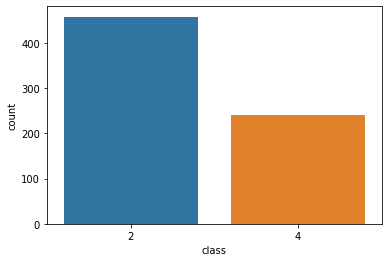

In [20]:
sns.countplot(x='class', data=data2) # Count of each class

<AxesSubplot:xlabel='class', ylabel='Density'>

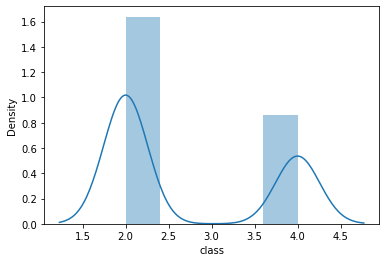

In [21]:
sns.distplot(data2['class']) # gives the distribution of the classes

### MULTIVARIATE DATA ANALYSIS

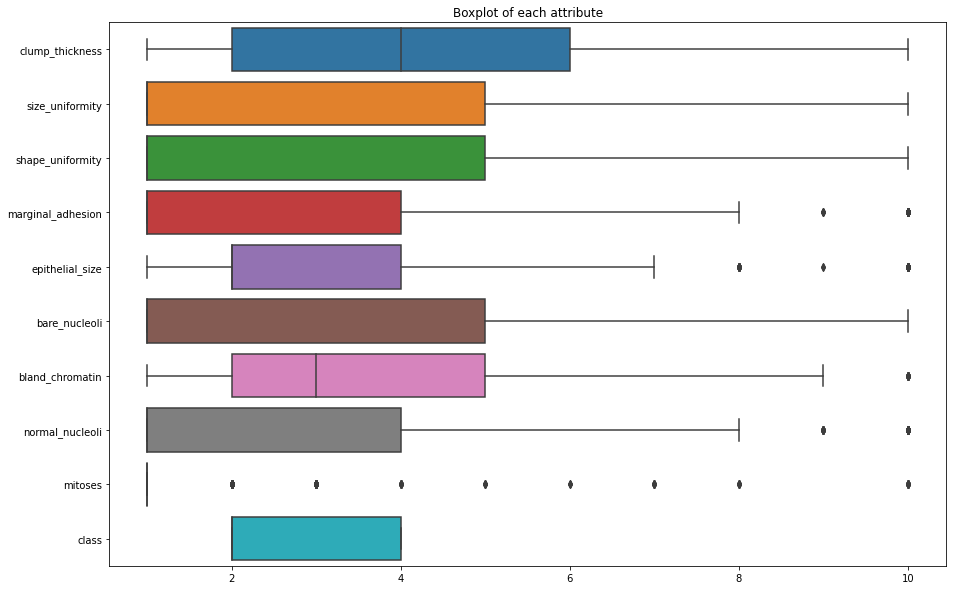

In [22]:
plt.figure(figsize=(15,10))
sns.boxplot(data=data2, orient='h') 
plt.title('Boxplot of each attribute')
plt.show()

### Number of outliers in each attribute

In [23]:
# Outlier detection
print(f"Outliers in clump_thickness: {data2[((data2['clump_thickness'] - data2['clump_thickness'].mean()) / data2['clump_thickness'].std()).abs() > 3]['clump_thickness'].count()}")
print(f"Outliers in size_uniformity: {data2[((data2['size_uniformity'] - data2['size_uniformity'].mean()) / data2['size_uniformity'].std()).abs() > 3]['size_uniformity'].count()}")
print(f"Outliers in shape_uniformity: {data2[((data2['shape_uniformity'] - data2['shape_uniformity'].mean()) / data2['shape_uniformity'].std()).abs() > 3]['shape_uniformity'].count()}")
print(f"Outliers in marginal_adhesion: {data2[((data2['marginal_adhesion'] - data2['marginal_adhesion'].mean()) / data2['marginal_adhesion'].std()).abs() > 3]['marginal_adhesion'].count()}")
print(f"Outliers in epithelial_size: {data2[((data2['epithelial_size'] - data2['epithelial_size'].mean()) / data2['epithelial_size'].std()).abs() > 3]['epithelial_size'].count()}")
print(f"Outliers in bare_nucleoli: {data2[((data2['bare_nucleoli'] - data2['bare_nucleoli'].mean()) / data2['bare_nucleoli'].std()).abs() > 3]['bare_nucleoli'].count()}")
print(f"Outliers in bland_chromatin: {data2[((data2['bland_chromatin'] - data2['bland_chromatin'].mean()) / data2['bland_chromatin'].std()).abs() > 3]['bland_chromatin'].count()}")
print(f"Outliers in normal_nucleoli: {data2[((data2['normal_nucleoli'] - data2['normal_nucleoli'].mean()) / data2['normal_nucleoli'].std()).abs() > 3]['normal_nucleoli'].count()}")
print(f"Outliers in mitoses: {data2[((data2['mitoses'] - data2['mitoses'].mean()) / data2['mitoses'].std()).abs() > 3]['mitoses'].count()}")


Outliers in clump_thickness: 0
Outliers in size_uniformity: 0
Outliers in shape_uniformity: 0
Outliers in marginal_adhesion: 0
Outliers in epithelial_size: 31
Outliers in bare_nucleoli: 0
Outliers in bland_chromatin: 0
Outliers in normal_nucleoli: 0
Outliers in mitoses: 31


### Taking care of the outliers

In [24]:
# Replacing outliers with the median value

for variables in data2.columns[:-1]:
    Q1 = data2[variables].quantile(0.25)
    Q3 = data2[variables].quantile(0.75)
    iqr = Q3 - Q1
    
    Lower_bound = Q1 - (1.5 * iqr)
    Upper_bound = Q3 + (1.5 * iqr)
    
    data2.loc[(data2[variables] < Lower_bound) | (data2[variables] > Upper_bound), variables] = data2[variables].median()


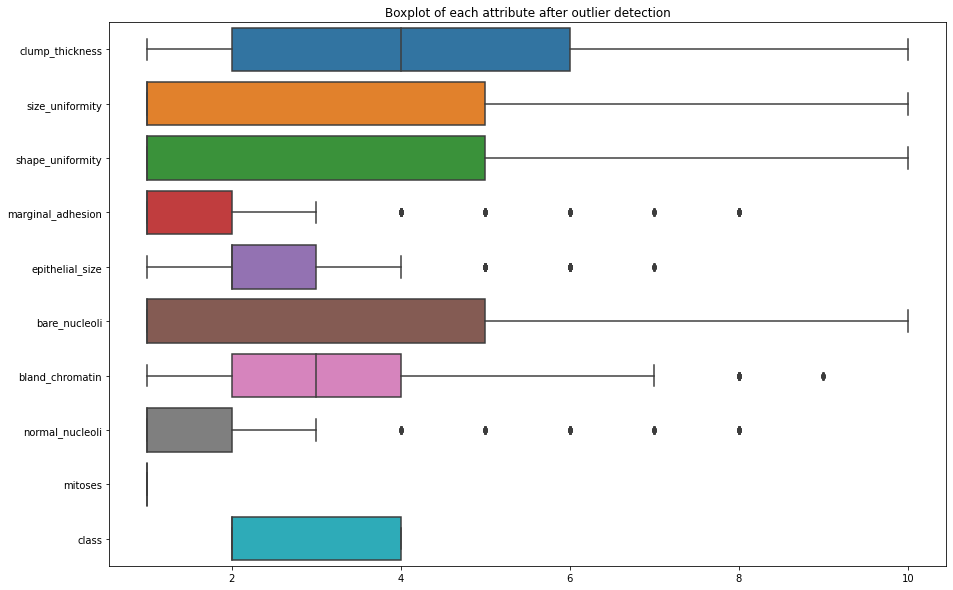

In [25]:
# Box plot after outlier detection

plt.figure(figsize=(15,10))
sns.boxplot(data=data2, orient='h') 
plt.title('Boxplot of each attribute after outlier detection')
plt.show()

In [26]:
data2.corr().replace(np.nan,0) # gives the correlation between the attributes

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
clump_thickness,1.000000,0.644913,0.654589,0.380974,0.438556,0.590008,0.541275,0.360647,0.0,0.716001
size_uniformity,0.644913,1.000000,0.906882,0.512067,0.576501,0.686673,0.673795,0.424118,0.0,0.817904
shape_uniformity,0.654589,0.906882,1.000000,0.479846,0.563209,0.707474,0.658369,0.396129,0.0,0.818934
marginal_adhesion,0.380974,0.512067,0.479846,1.000000,0.429617,0.477916,0.533309,0.327028,0.0,0.526830
epithelial_size,0.438556,0.576501,0.563209,0.429617,1.000000,0.517258,0.498668,0.355989,0.0,0.588020
bare_nucleoli,0.590008,0.686673,0.707474,0.477916,0.517258,1.000000,0.662519,0.437685,0.0,0.818968
bland_chromatin,0.541275,0.673795,0.658369,0.533309,0.498668,0.662519,1.000000,0.410876,0.0,0.725316
normal_nucleoli,0.360647,0.424118,0.396129,0.327028,0.355989,0.437685,0.410876,1.000000,0.0,0.463832
mitoses,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
class,0.716001,0.817904,0.818934,0.526830,0.588020,0.818968,0.725316,0.463832,0.0,1.000000


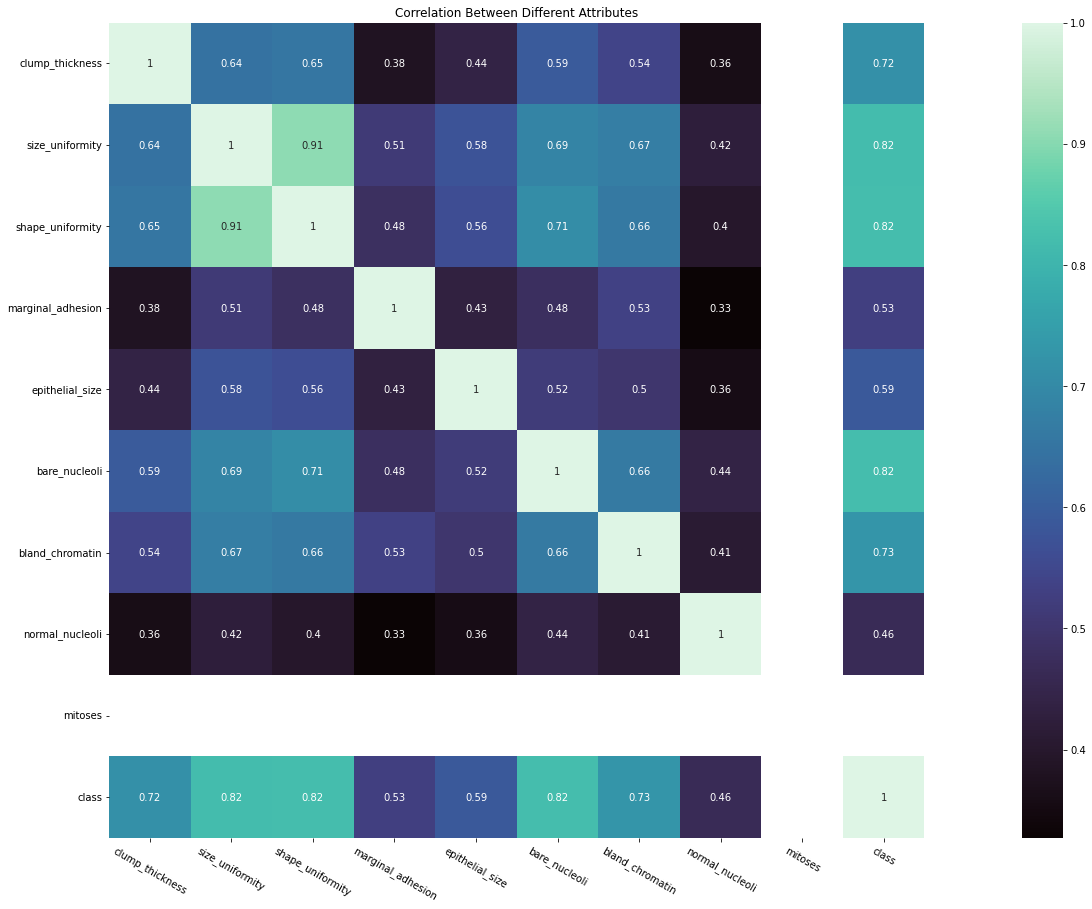

In [27]:
# Heatmap to show a visual representation of the above correlation

plt.figure(figsize=(35,15))
sns.heatmap(data2.corr(),square=True,annot=True,vmax=1,cmap='mako')
plt.title('Correlation Between Different Attributes')
plt.xticks(rotation=-30)
plt.show()

### We can see that mitoses is weakly (not - in this case) correlated with the class attribute.

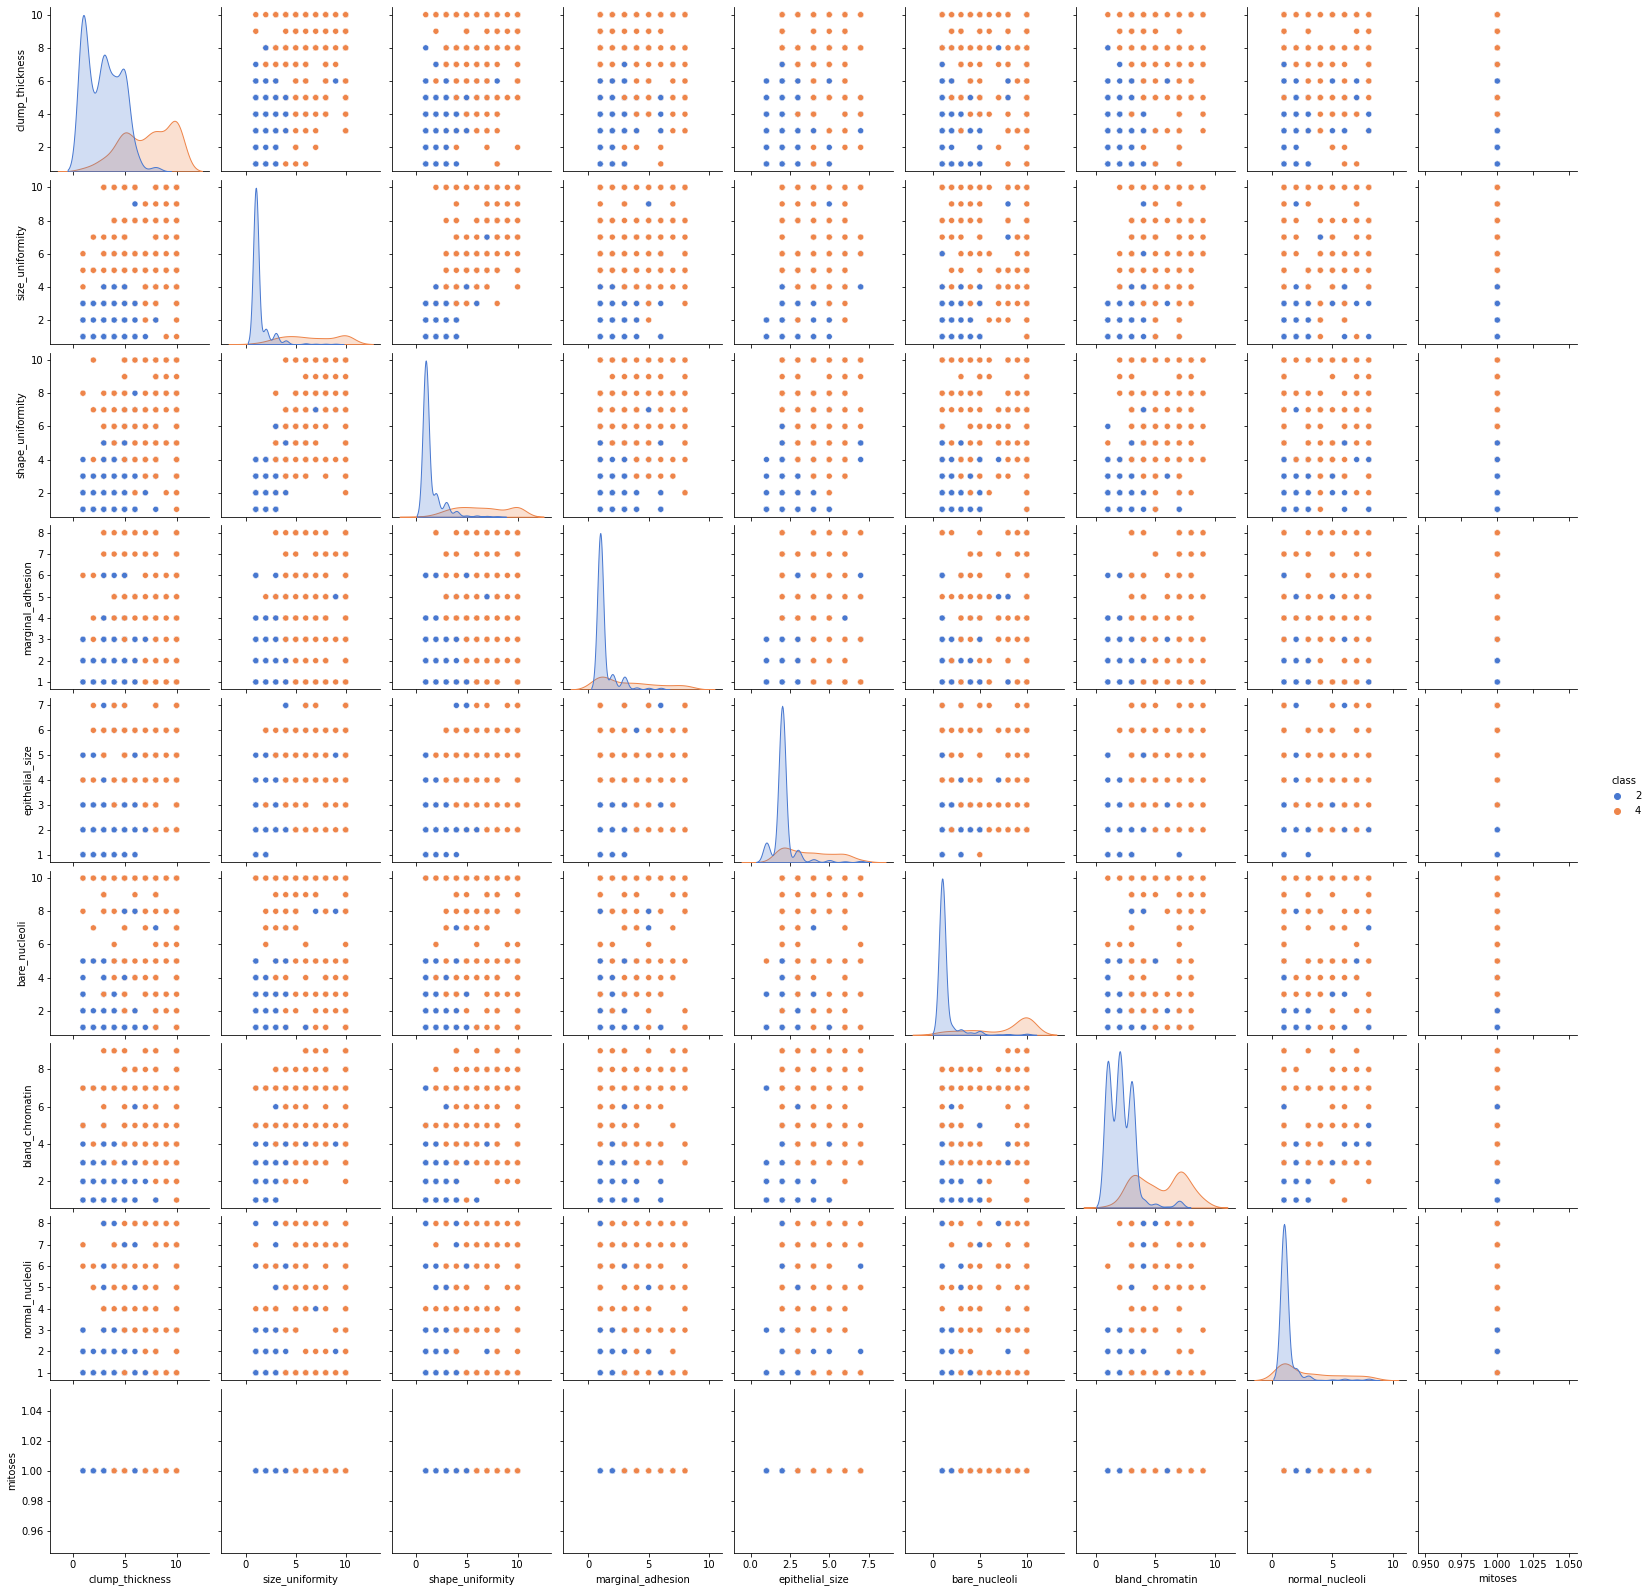

In [28]:
sns.pairplot(data2,hue='class',palette='muted') # gives the pairplot of each column

## BUILDING OUR MODEL

In [29]:
data2.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [30]:
#SPLITTING
X=data2.drop(['mitoses','class'],axis=1)
y=data2['class']

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)  

## KNeighbours Classifier

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
KNN=KNeighborsClassifier(n_neighbors=5,weights='distance')

In [35]:
KNN.fit(X_train,y_train)

KNeighborsClassifier(weights='distance')

In [36]:
Pred1=KNN.predict(X_test)
Pred1

array([2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4,
       4, 2, 4, 2, 4, 4, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4,
       4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4,
       4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4,
       4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 4, 2, 4, 4, 4,
       4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2], dtype=int64)

In [37]:
from scipy.stats import zscore
print("KNeighborsClassifier Algorithm is predicting with an accuracy of",round((KNN.score(X_test,y_test)*100),2),"%")

KNeighborsClassifier Algorithm is predicting with an accuracy of 97.14 %


## Support Vector Machine (SVM)

In [38]:
from sklearn.svm import SVC
svc=SVC(gamma=0.025,C=3)
svc.fit(X_train,y_train)

SVC(C=3, gamma=0.025)

In [39]:
Pred2=svc.predict(X_test)
Pred2

array([2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4,
       4, 2, 4, 2, 4, 4, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4,
       4, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4,
       4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 4,
       4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 4, 2, 4, 4, 4,
       4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2], dtype=int64)

In [40]:
print("Support Vector Classifier Algorithm is predicting with an accuracy of",round((svc.score(X_test,y_test)*100),2),"%")

Support Vector Classifier Algorithm is predicting with an accuracy of 96.19 %


## Naive Bayes Classifier

In [41]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [42]:
Pred3 = gnb.predict(X_test)
Pred3

array([2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 2, 2, 2, 2, 4,
       4, 2, 4, 2, 4, 4, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 2, 2, 2, 2, 4, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4,
       4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4,
       4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 4,
       4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 4, 2, 4, 4, 4,
       4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2], dtype=int64)

In [43]:
print("Naive Bayes Algorithm is predicting with an accuracy of",round((gnb.score(X_test,y_test)*100),2),"%")

Naive Bayes Algorithm is predicting with an accuracy of 98.1 %


## Comparing the Predictions

In [44]:
knnPredictions=pd.DataFrame(Pred1)
svmPredictions=pd.DataFrame(Pred2)
gnbPredictions=pd.DataFrame(Pred3)

In [45]:
data3=pd.concat([knnPredictions,svmPredictions,gnbPredictions],axis=1)
data3.columns=['knnPredictions','svmPredictions','gnbPredictions']
data3

,knnPredictions,svmPredictions,gnbPredictions
0,2,2,2
1,2,2,2
2,2,2,2
3,2,4,4
4,2,2,2
...,...,...,...
205,4,4,4
206,4,4,4
207,2,2,2
208,4,4,4


In [46]:
from sklearn.metrics import classification_report

In [47]:
print("\nKNN Classification Report\n")
print('...'*10)
print(classification_report(y_test,Pred1))


KNN Classification Report

..............................
              precision    recall  f1-score   support

           2       0.97      0.99      0.98       137
           4       0.97      0.95      0.96        73

    accuracy                           0.97       210
   macro avg       0.97      0.97      0.97       210
weighted avg       0.97      0.97      0.97       210



In [48]:
print("\nSVM Classification Report\n")
print('...'*10)
print(classification_report(y_test,Pred2))


SVM Classification Report

..............................
              precision    recall  f1-score   support

           2       0.98      0.96      0.97       137
           4       0.93      0.96      0.95        73

    accuracy                           0.96       210
   macro avg       0.96      0.96      0.96       210
weighted avg       0.96      0.96      0.96       210



In [49]:
print("\nNaive Bayes Classification Report\n")
print('...'*10)
print(classification_report(y_test,Pred3))


Naive Bayes Classification Report

..............................
              precision    recall  f1-score   support

           2       0.99      0.98      0.99       137
           4       0.96      0.99      0.97        73

    accuracy                           0.98       210
   macro avg       0.98      0.98      0.98       210
weighted avg       0.98      0.98      0.98       210



## CONFUSION MATRICES


Confusion Matrix for KNN



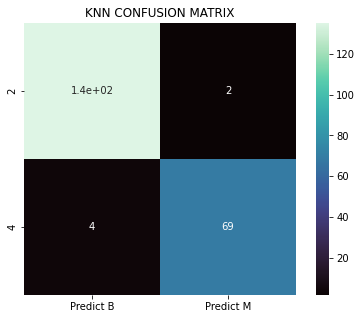

In [50]:
from sklearn import metrics

print("\nConfusion Matrix for KNN\n")
cm1=metrics.confusion_matrix(y_test,Pred1,labels=[2,4])

df_cm1=pd.DataFrame(cm1,index=[i for i in [2,4]],columns=[i for i in ["Predict B", "Predict M"]])

plt.figure(figsize=(7,5))

plt.title("KNN CONFUSION MATRIX")
sns.heatmap(df_cm1,annot=True,square=True,cmap='mako')
plt.show()


Confusion Matrix for SVM



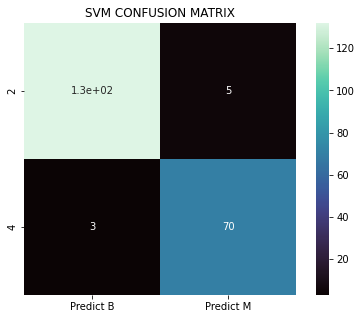

In [51]:
print("\nConfusion Matrix for SVM\n")
cm2=metrics.confusion_matrix(y_test,Pred2,labels=[2,4])

df_cm2=pd.DataFrame(cm2,index=[i for i in [2,4]],columns=[i for i in ["Predict B", "Predict M"]])

plt.figure(figsize=(7,5))

plt.title("SVM CONFUSION MATRIX")
sns.heatmap(df_cm2,annot=True,square=True,cmap='mako')
plt.show()


Confusion Matrix for Naive Bayes



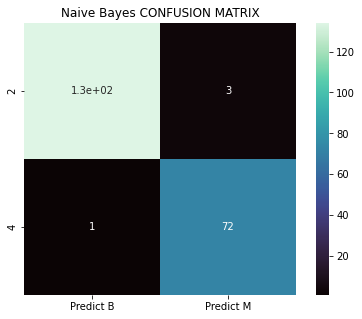

In [52]:
print("\nConfusion Matrix for Naive Bayes\n")
cm3 = metrics.confusion_matrix(y_test,Pred3,labels=[2,4])

df_cm3 = pd.DataFrame(cm3,index=[i for i in [2,4]],columns=[i for i in ["Predict B", "Predict M"]])

plt.figure(figsize=(7,5))

plt.title("Naive Bayes CONFUSION MATRIX")
sns.heatmap(df_cm3,annot=True,square=True,cmap='mako')
plt.show()

### Accuracies :<br>
### 1. KNeighbours Classifier : 97.14% <br>
### 2. Support Vector Machine (SVM) Classifier : 96.19% <br>
### 3. Naive Bayes Classifier : 98.1%

### Conclusion : Naive Bayes Classifier is the best classifier for this dataset among all the three classifiers.